In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Import dataset

In [2]:
import FinanceDataReader as fdr
netflix = fdr.DataReader('NFLX', start = '2018', end = '2024').drop(columns = "Adj Close").reset_index()
netflix

,Date,Open,High,Low,Close,Volume
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,10966900
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,8591400
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,6029600
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,7033200
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,5580200
...,...,...,...,...,...,...
1504,2023-12-22,494.000000,496.019989,485.450012,486.760010,2701100
1505,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500
1506,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300
1507,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500


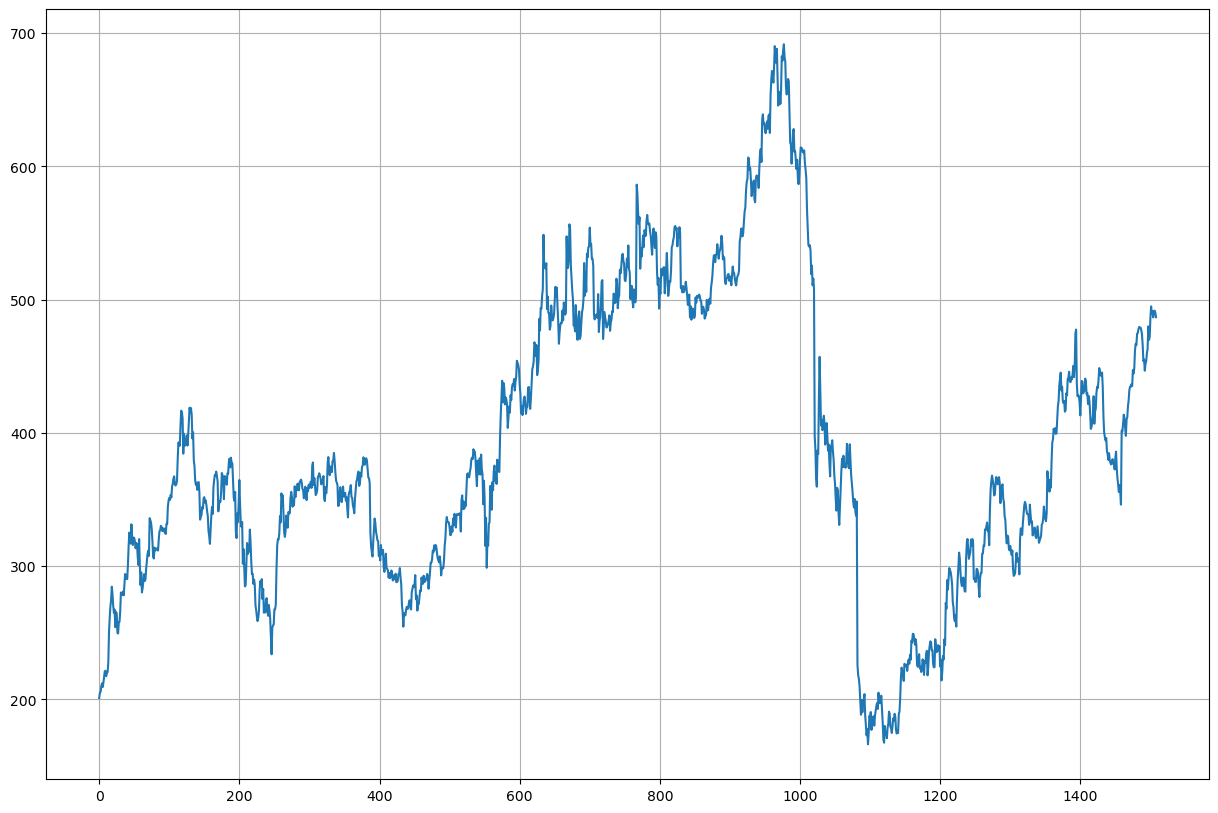

In [3]:
# Visualize close price
plt.figure(figsize = (15, 10))
netflix["Close"].plot()
plt.grid()

In [4]:
# 종가(Close)를 기준으로 전일 대비 등락 폭 계산
netflix["1d_RoC"] = ((netflix["Close"] - netflix["Close"].shift(1)) / netflix["Close"].shift(1)) * 100
netflix["5d_RoC"] = ((netflix["Close"] - netflix["Close"].shift(5)) / netflix["Close"].shift(5)) * 100
netflix

,Date,Open,High,Low,Close,Volume,1d_RoC,5d_RoC
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,10966900,NaN,NaN
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,8591400,1.979408,NaN
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,6029600,0.282859,NaN
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,7033200,2.120313,NaN
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,5580200,0.980998,NaN
...,...,...,...,...,...,...,...,...
1504,2023-12-22,494.000000,496.019989,485.450012,486.760010,2701100,-0.986549,3.114013
1505,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500,0.910098,1.042954
1506,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300,0.122154,-0.652495
1507,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500,-0.260273,0.253443


In [5]:
# 5일 이동평균 계산
netflix["5MA"] = netflix["Close"].rolling(window=5).mean()

# 120일 이동평균 계산
netflix["120MA"] = netflix["Close"].rolling(window=120).mean()

netflix

,Date,Open,High,Low,Close,Volume,1d_RoC,5d_RoC,5MA,120MA
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,10966900,NaN,NaN,NaN,NaN
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,8591400,1.979408,NaN,NaN,NaN
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,6029600,0.282859,NaN,NaN,NaN
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,7033200,2.120313,NaN,NaN,NaN
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,5580200,0.980998,NaN,206.758005,NaN
...,...,...,...,...,...,...,...,...,...,...
1504,2023-12-22,494.000000,496.019989,485.450012,486.760010,2701100,-0.986549,3.114013,489.755994,428.003999
1505,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500,0.910098,1.042954,490.769995,428.440249
1506,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300,0.122154,-0.652495,490.123999,428.887666
1507,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500,-0.260273,0.253443,490.372003,429.294333


### Add indicators

In [6]:
import ta

window = 20
H, L, C, V = netflix['High'], netflix['Low'], netflix['Close'], netflix['Volume']

netflix.loc[:,'bol_high'] = ta.volatility.bollinger_hband(C)
netflix.loc[:, 'bol_low']  = ta.volatility.bollinger_lband(C)
netflix.loc[:, 'ADI'] = ta.volume.acc_dist_index(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    fillna=True
)
netflix.loc[:, 'OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
netflix.loc[:, 'CMF'] = ta.volume.chaikin_money_flow(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=window,
    fillna=True
)
netflix.loc[:, 'FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
netflix.loc[:, 'EOM'] = ta.volume.ease_of_movement(
    high=netflix['High'],
    low=netflix['Low'],
    volume=netflix['Volume'],
    window=window,
    fillna=True
)
netflix.loc[:, 'VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
netflix.loc[:, 'NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
netflix.loc[:, 'VMAP'] = ta.volume.volume_weighted_average_price(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=window,
    fillna=True
)
netflix.loc[:, 'ATR'] = ta.volatility.average_true_range(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
netflix.loc[:, 'BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
netflix.loc[:, 'KCH'] = ta.volatility.keltner_channel_hband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'KCL'] = ta.volatility.keltner_channel_lband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'KCM'] = ta.volatility.keltner_channel_mband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'DCH'] = ta.volatility.donchian_channel_hband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'DCL'] = ta.volatility.donchian_channel_lband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)

netflix.loc[:, 'DCM'] = ta.volatility.donchian_channel_mband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
netflix.loc[:, 'SMA'] = ta.trend.sma_indicator(close=C, window=window, fillna=True)
netflix.loc[:, 'EMA'] = ta.trend.ema_indicator(close=C, window=window, fillna=True)
netflix.loc[:, 'WMA'] = ta.trend.wma_indicator(close=C, window=window, fillna=True)
netflix.loc[:, 'MACD'] = ta.trend.macd(close=C, fillna=True)
netflix.loc[:, 'ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
netflix.loc[:, '-VI'] = ta.trend.vortex_indicator_neg(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, '+VI'] = ta.trend.vortex_indicator_pos(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=window,
    fillna=True
)
netflix.loc[:, 'TRIX'] = ta.trend.trix(close=C, fillna=True)
netflix.loc[:, 'MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
netflix.loc[:, 'CCI'] = ta.trend.cci(high=H, low=L, close=C, window=window, fillna=True)
netflix.loc[:, 'DPO'] = ta.trend.dpo(close=C, fillna=True)
netflix.loc[:, 'KST'] = ta.trend.kst(close=C, fillna=True)
netflix.loc[:, 'STC'] = ta.trend.stc(close=C, fillna=True)
netflix.loc[:, 'RSI'] = ta.momentum.rsi(close=C, window=window, fillna=True)
netflix.loc[:, 'SRSI'] = ta.momentum.stochrsi(close=C, window=window, fillna=True)
netflix.loc[:, 'UO'] = ta.momentum.ultimate_oscillator(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window1 = window//4,
    window2 = window//2,
    window3=window,
    weight1=4.0,
    weight2=2.0,
    weight3=1.0,
    fillna=True
)
netflix.loc[:, 'MFI'] = ta.volume.money_flow_index(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=window,
    fillna=True
)

In [7]:
netflix.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', '1d_RoC', '5d_RoC',
       '5MA', '120MA', 'bol_high', 'bol_low', 'ADI', 'OBV', 'CMF', 'FI', 'EOM',
       'VPT', 'NVI', 'VMAP', 'ATR', 'BHB', 'BLB', 'KCH', 'KCL', 'KCM', 'DCH',
       'DCL', 'DCM', 'UI', 'SMA', 'EMA', 'WMA', 'MACD', 'ADX', '-VI', '+VI',
       'TRIX', 'MI', 'CCI', 'DPO', 'KST', 'STC', 'RSI', 'SRSI', 'UO', 'MFI'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', 10)
netflix

,Date,Open,High,Low,Close,...,STC,RSI,SRSI,UO,MFI
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,...,0.000000,100.000000,0.000000,0.000000,50.000000
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,...,0.000000,100.000000,0.000000,35.004375,100.000000
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,...,0.000000,100.000000,0.000000,38.904309,100.000000
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,...,0.000000,100.000000,0.000000,53.103482,100.000000
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,...,0.000000,100.000000,0.000000,59.450057,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
1504,2023-12-22,494.000000,496.019989,485.450012,486.760010,...,94.696172,62.538472,0.499996,51.777169,46.650100
1505,2023-12-26,489.390015,491.480011,486.380005,491.190002,...,97.348086,63.937013,0.572409,51.204505,45.646845
1506,2023-12-27,491.239990,494.019989,489.250000,491.790009,...,98.674043,64.127944,0.622607,44.133934,49.001190
1507,2023-12-28,492.000000,492.890015,489.070007,490.510010,...,99.337022,63.374488,0.665375,48.494698,49.664784


In [9]:
netflix = netflix.iloc[252:, :]
netflix.reset_index(drop = True, inplace = True)
netflix

,Date,Open,High,Low,Close,...,STC,RSI,SRSI,UO,MFI
0,2019-01-03,270.200012,275.790009,264.429993,271.200012,...,65.139658,47.860636,1.000000,66.727970,48.573717
1,2019-01-04,281.880005,297.799988,278.540009,297.570007,...,80.158938,55.919242,1.000000,72.465683,55.487262
2,2019-01-07,302.100006,316.799988,301.649994,315.339996,...,90.079469,60.274528,1.000000,77.734213,62.107468
3,2019-01-08,319.980011,320.589996,308.010010,320.269989,...,95.039735,61.388614,1.000000,82.302170,67.663419
4,2019-01-09,317.709991,323.350006,313.500000,319.959991,...,97.519867,61.274872,0.995797,83.170663,71.952129
...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-12-22,494.000000,496.019989,485.450012,486.760010,...,94.696172,62.538472,0.499996,51.777169,46.650100
1253,2023-12-26,489.390015,491.480011,486.380005,491.190002,...,97.348086,63.937013,0.572409,51.204505,45.646845
1254,2023-12-27,491.239990,494.019989,489.250000,491.790009,...,98.674043,64.127944,0.622607,44.133934,49.001190
1255,2023-12-28,492.000000,492.890015,489.070007,490.510010,...,99.337022,63.374488,0.665375,48.494698,49.664784


In [10]:
fb = fdr.DataReader('META', start = '2018', end = '2024').drop(columns = "Adj Close").reset_index()
pins = fdr.DataReader('PINS', start = '2018', end = '2024').drop(columns = "Adj Close").reset_index()
spot = fdr.DataReader('SPOT', start = '2018', end = '2024').drop(columns = "Adj Close").reset_index()

sub = fb.loc[:, ["Date", "Close"]]
sub = pd.merge(sub, pins.loc[:, ["Date", "Close"]], on = "Date", how = "left")
sub = pd.merge(sub, spot.loc[:, ["Date", "Close"]], on = "Date")
sub.columns = ["Date", "SPOT", "PINS", "FB"]

netflix = pd.merge(netflix, sub, on = "Date")
netflix.shape

(1257, 50)

### Missing values

In [11]:
netflix.loc[:, ["Date", "PINS", "FB", "SPOT"]]

,Date,PINS,FB,SPOT
0,2019-01-03,NaN,109.019997,131.740005
1,2019-01-04,NaN,118.510002,137.949997
2,2019-01-07,NaN,119.360001,138.050003
3,2019-01-08,NaN,117.480003,142.529999
4,2019-01-09,NaN,122.690002,144.229996
...,...,...,...,...
1252,2023-12-22,37.380001,189.589996,353.390015
1253,2023-12-26,37.160000,189.880005,354.829987
1254,2023-12-27,37.299999,190.270004,357.829987
1255,2023-12-28,37.270000,188.750000,358.320007


In [12]:
netflix.bfill(inplace=True)
netflix.loc[:, ["Date", "PINS", "FB", "SPOT"]]

,Date,PINS,FB,SPOT
0,2019-01-03,24.400000,109.019997,131.740005
1,2019-01-04,24.400000,118.510002,137.949997
2,2019-01-07,24.400000,119.360001,138.050003
3,2019-01-08,24.400000,117.480003,142.529999
4,2019-01-09,24.400000,122.690002,144.229996
...,...,...,...,...
1252,2023-12-22,37.380001,189.589996,353.390015
1253,2023-12-26,37.160000,189.880005,354.829987
1254,2023-12-27,37.299999,190.270004,357.829987
1255,2023-12-28,37.270000,188.750000,358.320007


### Check correlation

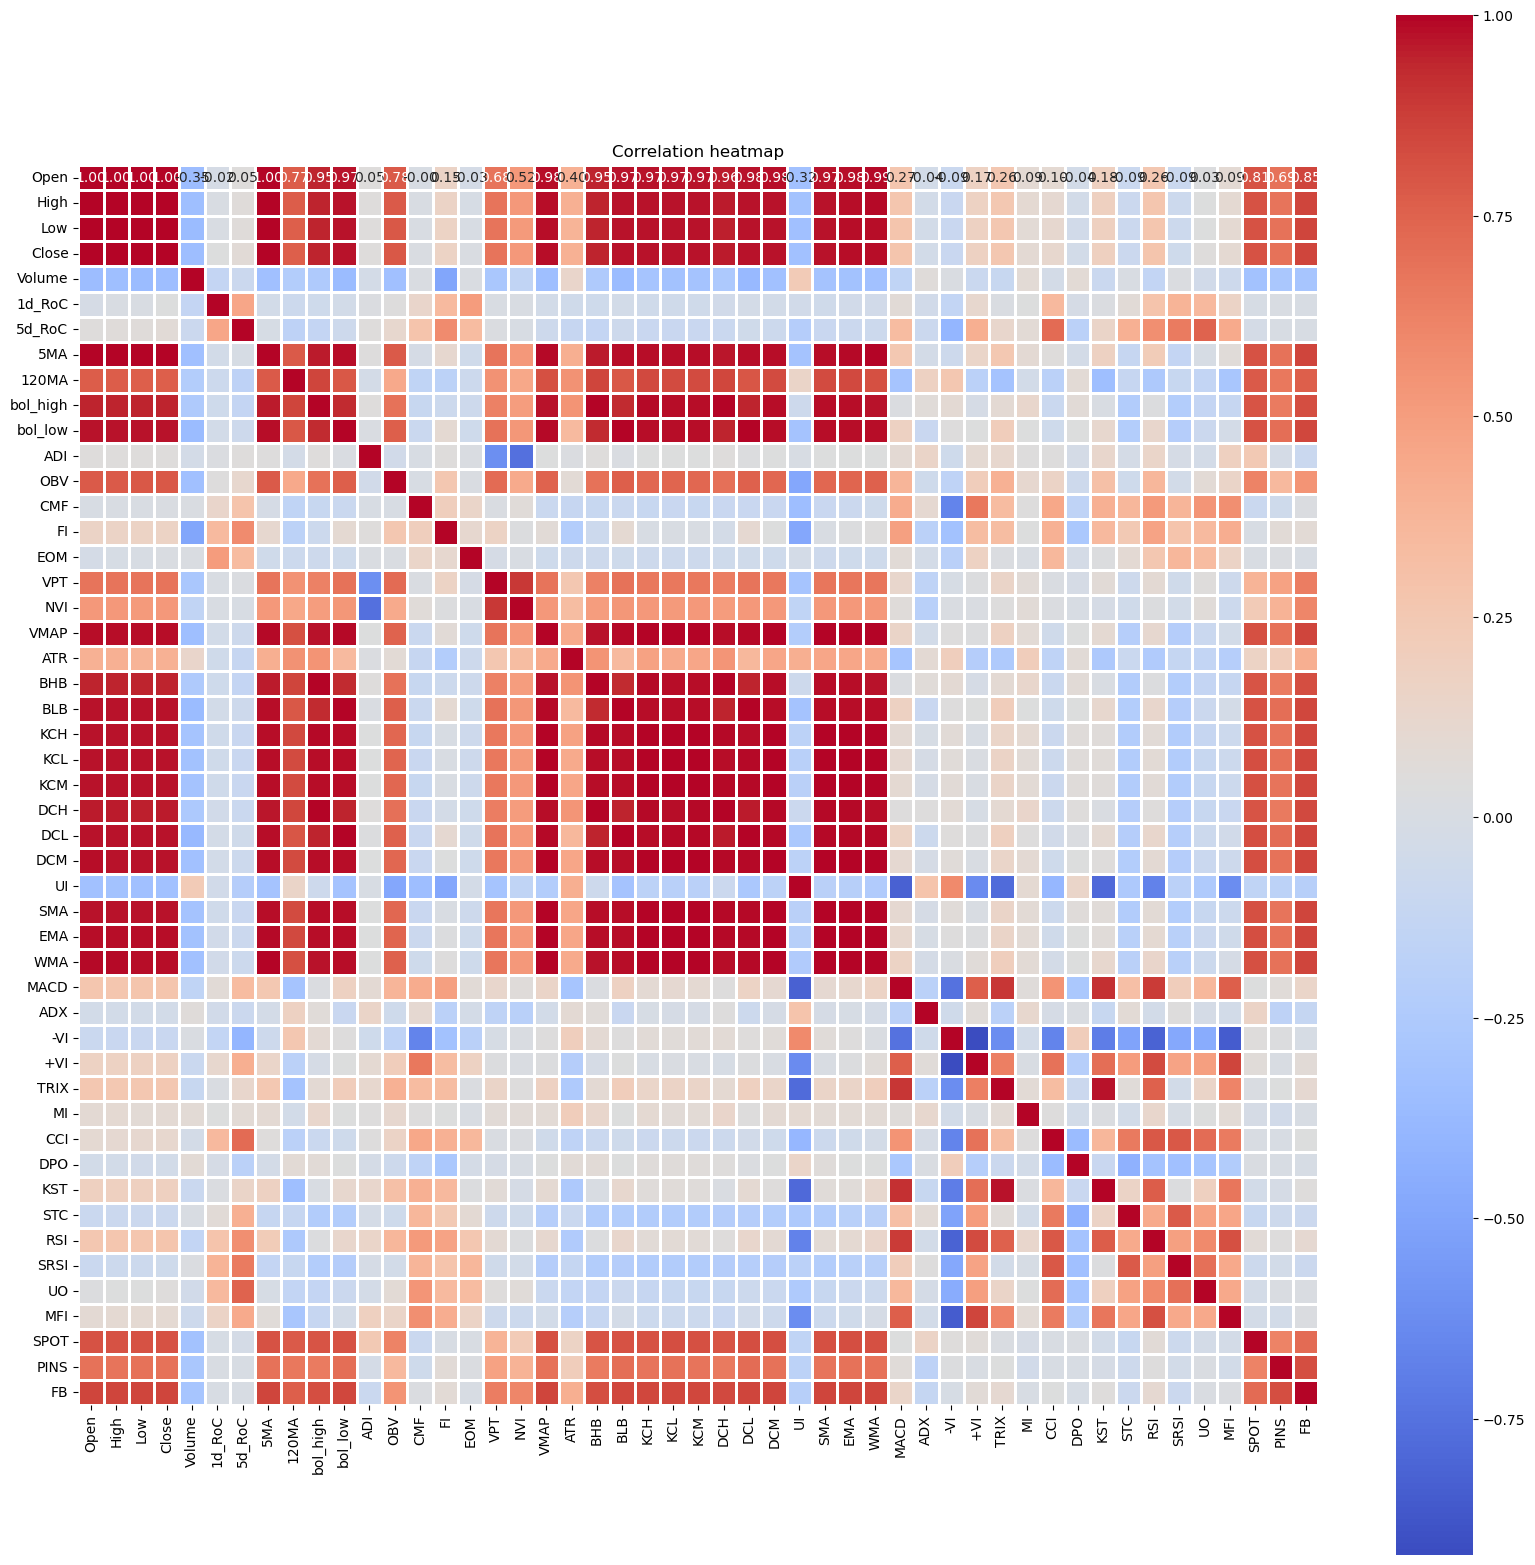

In [13]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    netflix.select_dtypes(include=['float64', 'int']).corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    fmt=".2f",
)

plt.title('Correlation heatmap')
plt.show()

In [14]:
netflix.drop(['VMAP', 'BHB', 'BLB', 'KCH', 'KCL', 'KCM', 'DCH', 'DCL', 'DCM', 'SMA', 'EMA', 'WMA'], axis = 1, inplace = True)
netflix.shape

(1257, 38)

In [15]:
netflix

,Date,Open,High,Low,Close,...,UO,MFI,SPOT,PINS,FB
0,2019-01-03,270.200012,275.790009,264.429993,271.200012,...,66.727970,48.573717,131.740005,24.400000,109.019997
1,2019-01-04,281.880005,297.799988,278.540009,297.570007,...,72.465683,55.487262,137.949997,24.400000,118.510002
2,2019-01-07,302.100006,316.799988,301.649994,315.339996,...,77.734213,62.107468,138.050003,24.400000,119.360001
3,2019-01-08,319.980011,320.589996,308.010010,320.269989,...,82.302170,67.663419,142.529999,24.400000,117.480003
4,2019-01-09,317.709991,323.350006,313.500000,319.959991,...,83.170663,71.952129,144.229996,24.400000,122.690002
...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-12-22,494.000000,496.019989,485.450012,486.760010,...,51.777169,46.650100,353.390015,37.380001,189.589996
1253,2023-12-26,489.390015,491.480011,486.380005,491.190002,...,51.204505,45.646845,354.829987,37.160000,189.880005
1254,2023-12-27,491.239990,494.019989,489.250000,491.790009,...,44.133934,49.001190,357.829987,37.299999,190.270004
1255,2023-12-28,492.000000,492.890015,489.070007,490.510010,...,48.494698,49.664784,358.320007,37.270000,188.750000


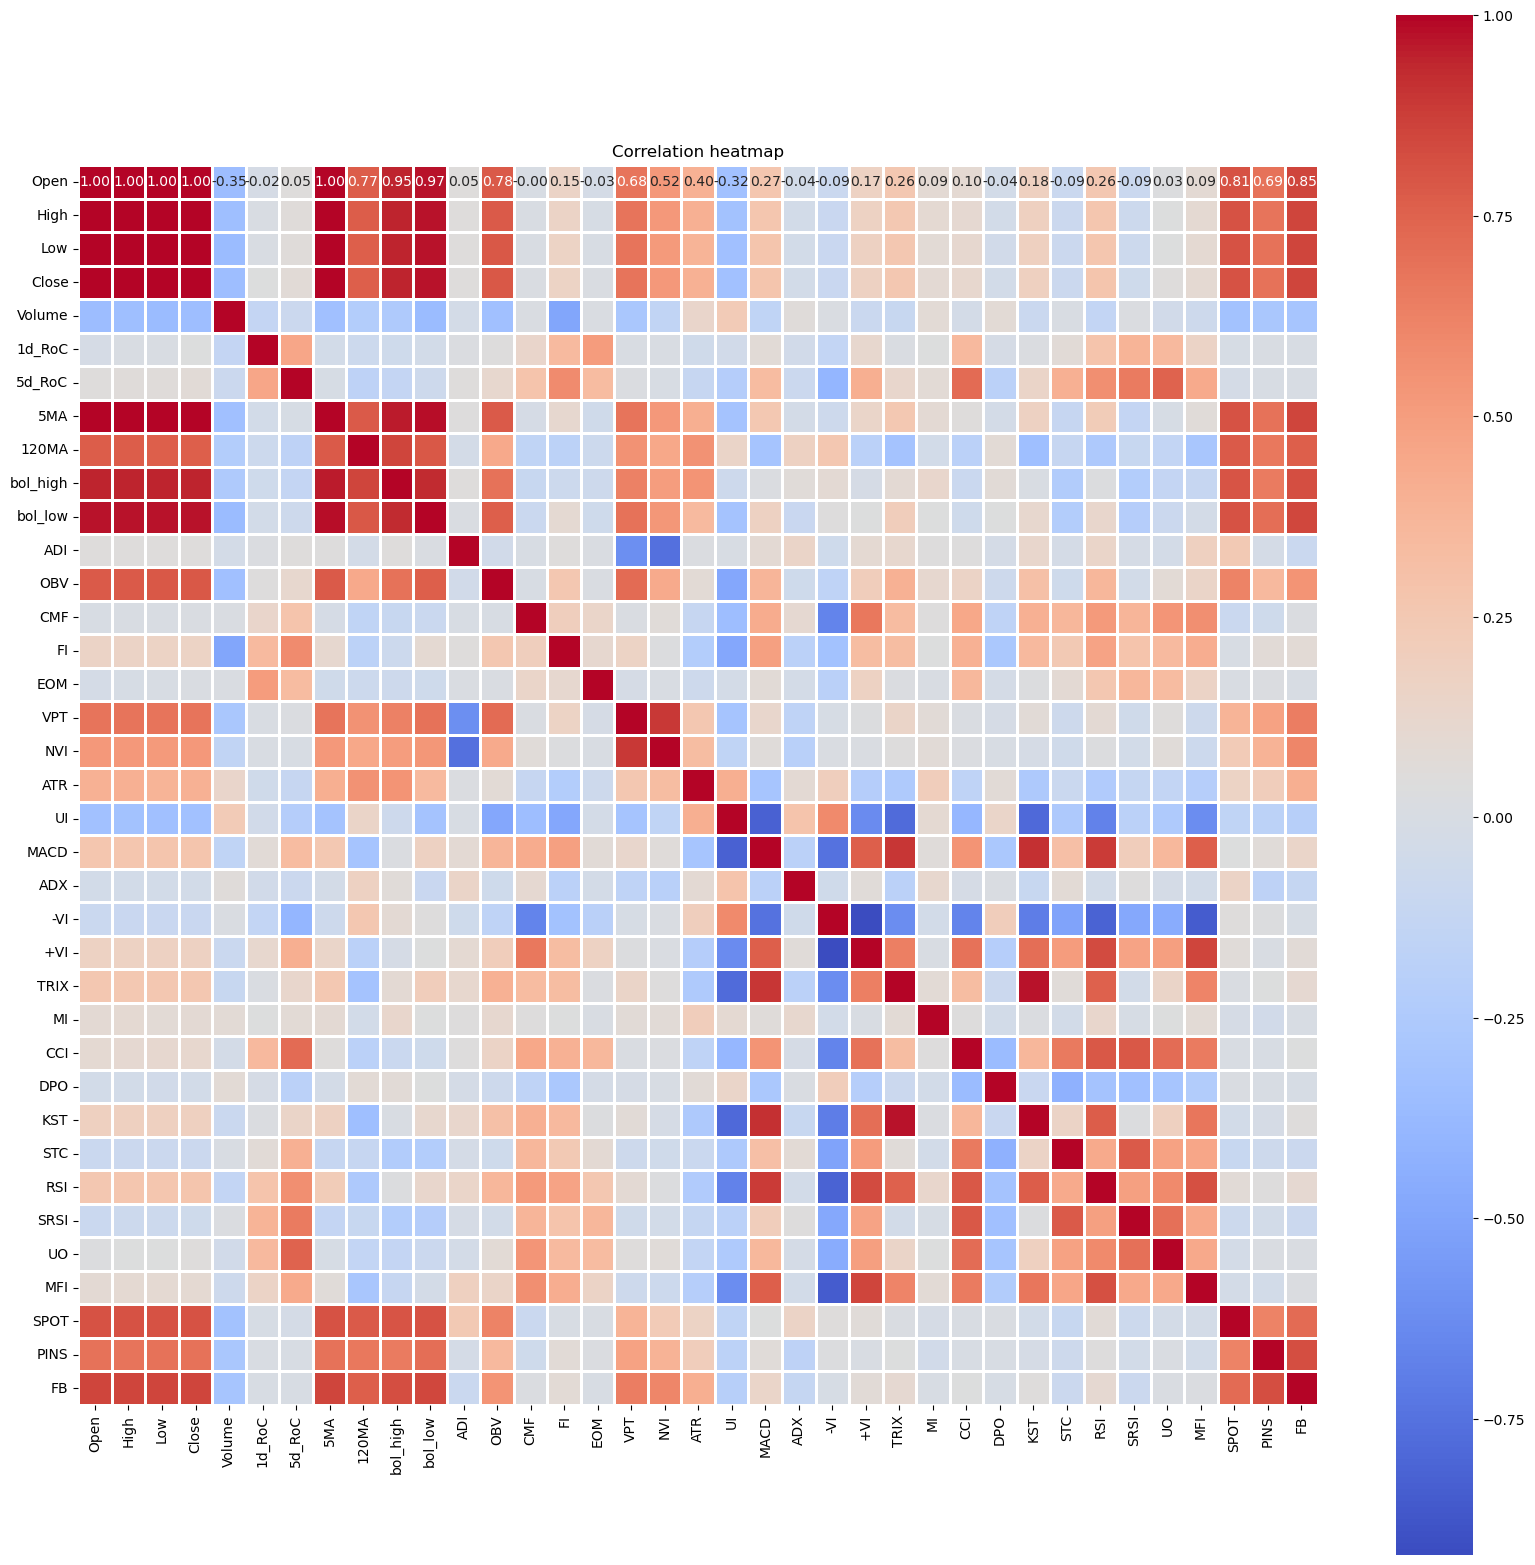

In [16]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    netflix.select_dtypes(include=['float64', 'int']).corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    fmt=".2f",
)

plt.title('Correlation heatmap')
plt.show()

### Save

In [17]:
netflix.to_csv("netflix_60.csv")

## Visualization

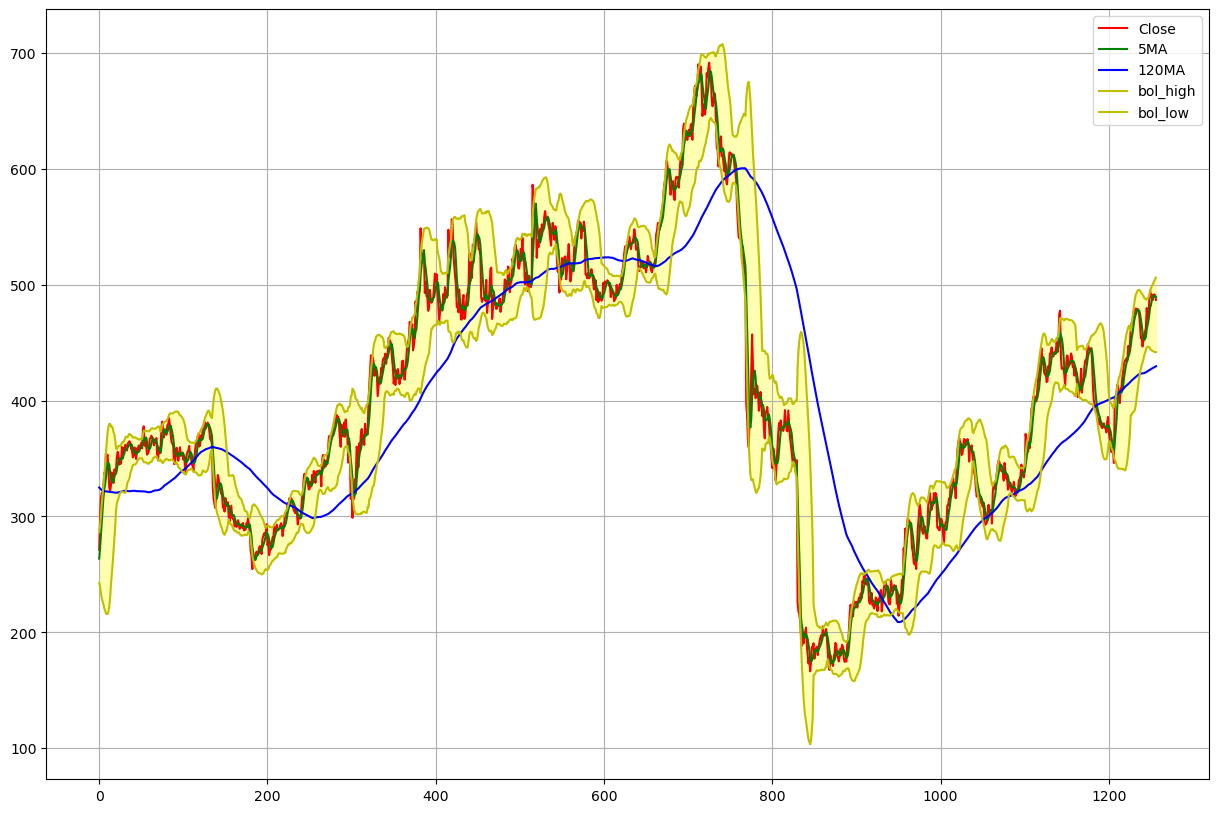

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
netflix[["Close", "5MA", "120MA", "bol_high", "bol_low"]].plot(ax = ax, color = ["r", "g", "b", "y", "y"])
ax.fill_between(netflix.index, netflix['bol_low'], netflix['bol_high'], color='yellow', alpha=0.3)
plt.grid()
plt.show()
plt.close()

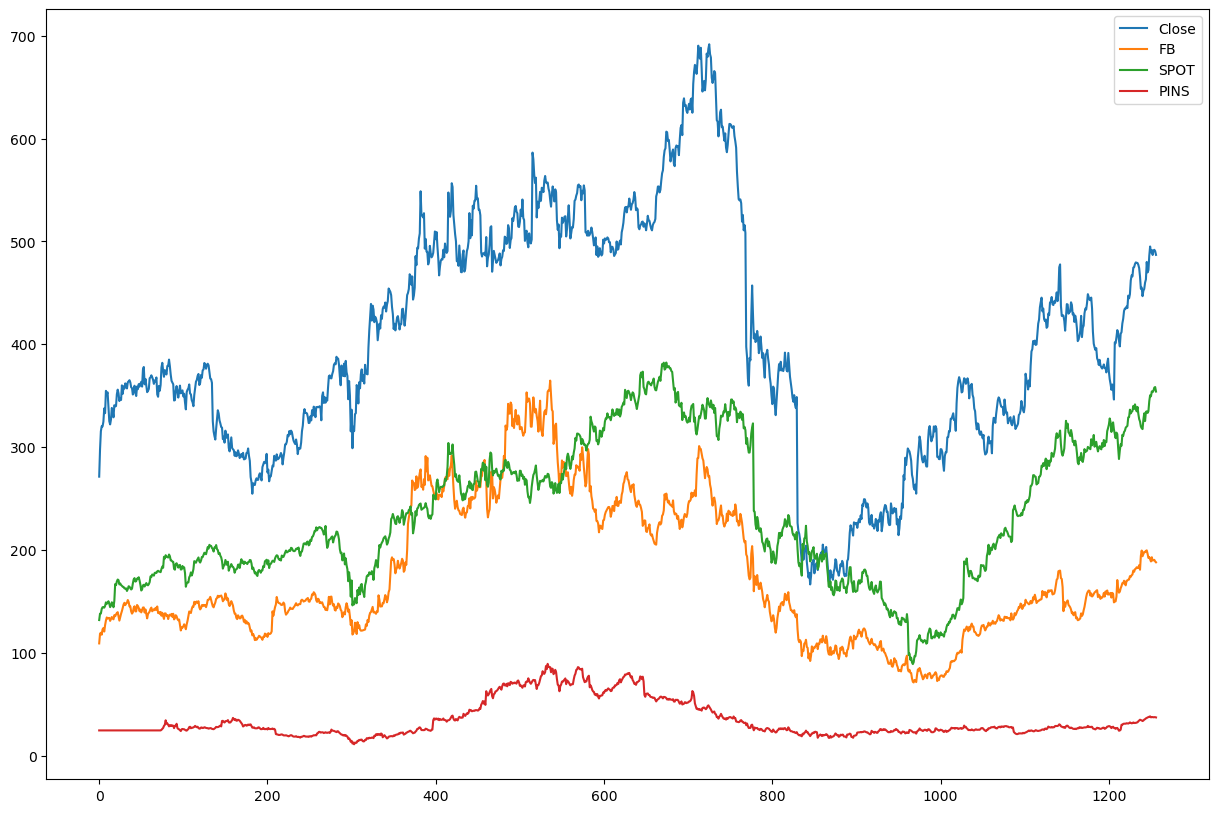

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
netflix[["Close", "FB", "SPOT", "PINS"]].plot(ax=ax)
plt.show()
plt.close()

<Axes: >

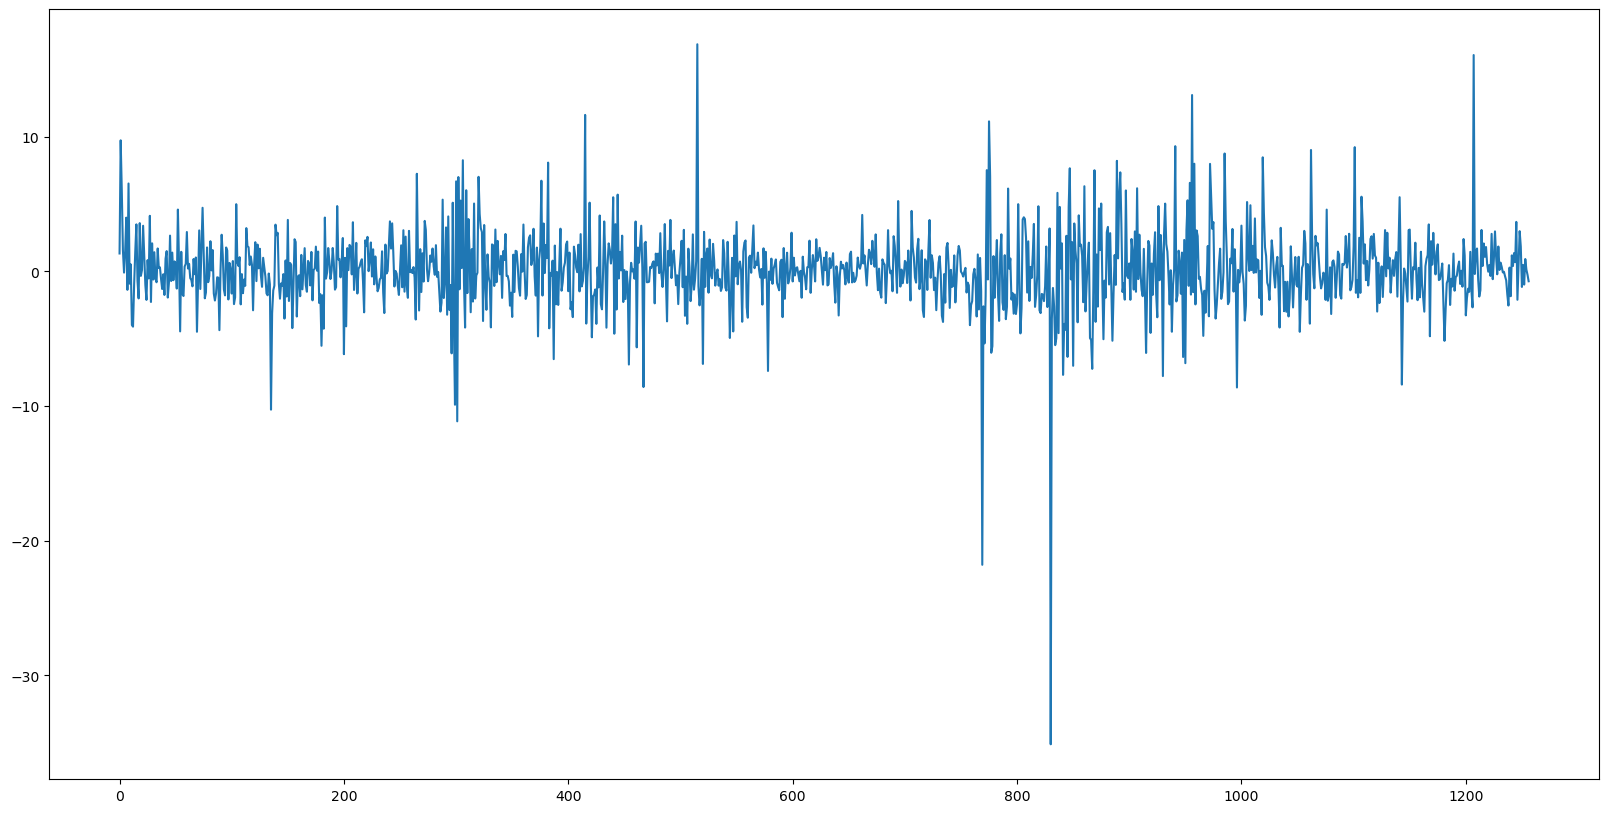

In [21]:
plt.figure(figsize = (20, 10))
netflix["1d_RoC"].plot()

C:\Users\sol91\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='1d_RoC', ylabel='Count'>

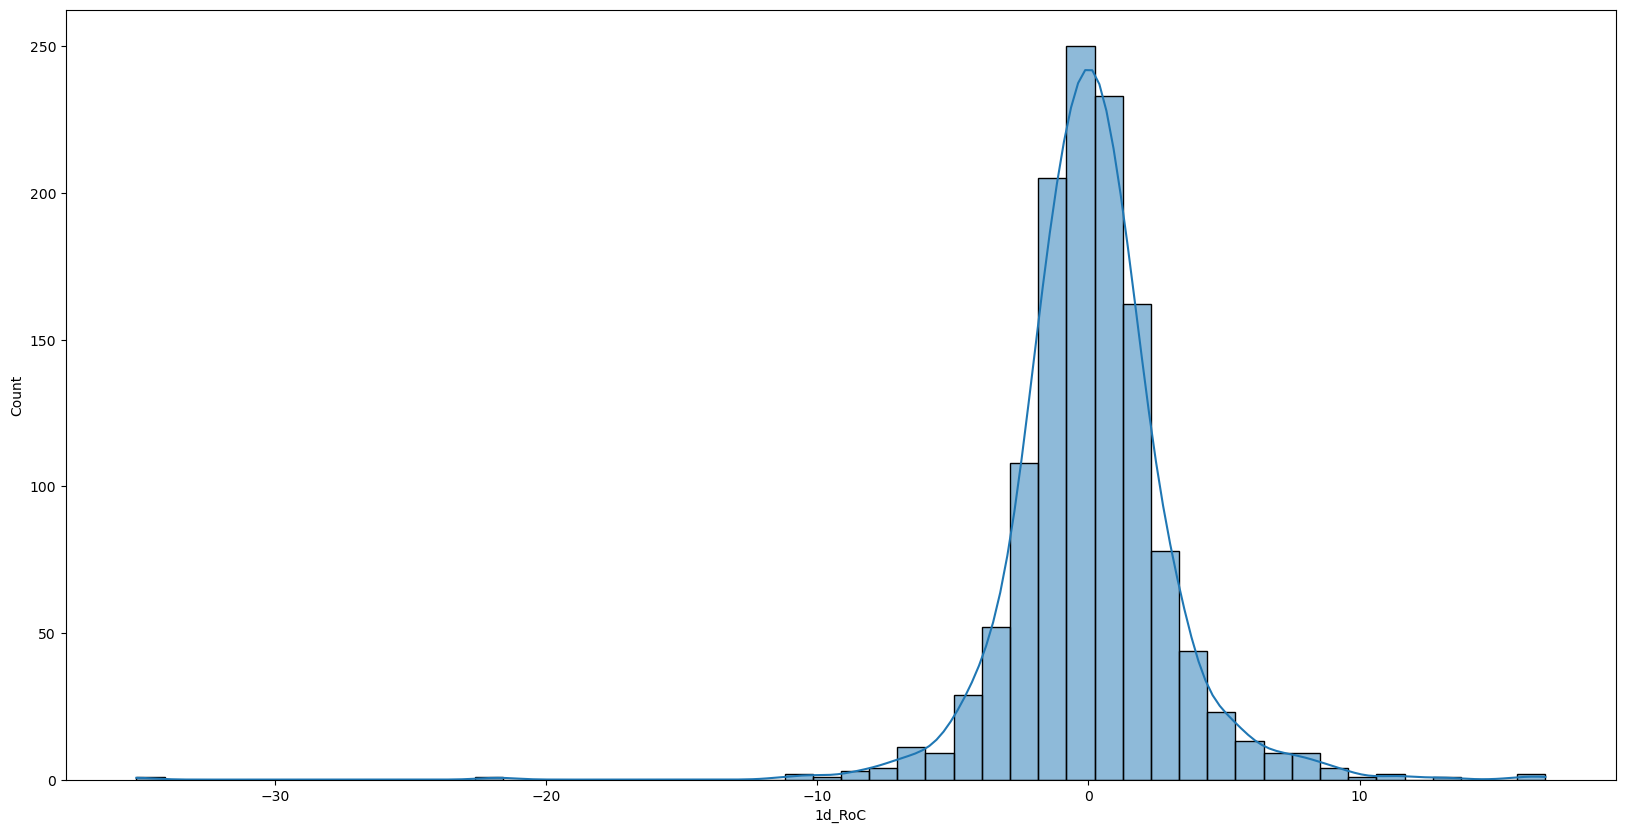

In [22]:
# 주가 변동성
plt.figure(figsize = (20, 10))
sns.histplot(data=netflix, x='1d_RoC', bins = 50, kde = True)